# **Modelling and Evaluation C - Benign and Malignant classification of Skin Lesions**

## Objectives

Answer Business requirement 2:
The client wants to be able to know from the photo of a skin lesion if it is a bening or malignant one.

## Inputs
* input/Benign_Malignant_Dataset/MainData/  
    * test  
      * benign  
      * malignant  
    * train  
      * benign  
      * malignant   
    * validation  
      * benign  
      * malignant 
* image shape embeddings

## Outputs

* Images distribution plot in train, validation, and test set
* Image augmentation
* Class indices to change prediction inference in labels
* Machine learning model creation and training
* Saved model
* Learning curve plot for model performance
* Model evaluation on pickle file
* Prediction on the random image file.

---

### Change working directory

We need to change the working directory from its current folder to its parent folder

* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/Users/carolina/Documents/CodeInstitute/benign-malignant-classification/jupyter_notebooks'

We want to make the parent of the current directory the new current directory

* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory


In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
working_dir = os.getcwd()
working_dir

'/Users/carolina/Documents/CodeInstitute/benign-malignant-classification'

### Import regular packages

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

### Set input directories

Set train, validation and test paths

In [6]:
input_dir = 'input/Benign_Malignant_DataSet/MainData/'
train_path = os.path.join(input_dir, 'train')
test_path = os.path.join(input_dir, 'test')
validation_path = os.path.join(input_dir, 'validation')

In [7]:
version = 'v1'
file_path = os.path.join('outputs', version)

if 'outputs' in os.listdir(working_dir) and version in \
        os.listdir(os.path.join(working_dir, 'outputs')):
    print('This version of the output dataset already exists.')
    pass
else:
    os.makedirs(name=file_path)

This version of the output dataset already exists.


### Set label names

In [8]:
labels = os.listdir(train_path)
print(f'Image labels are: {labels}') 

Image labels are: ['malignant', 'benign']


## Load image shape

### Import saved image shape embedding

In [9]:
import joblib

image_shape = joblib.load(filename=f'outputs/{version}/image_shape.pkl')
image_shape

(320, 442, 3)

## Number of images in train, test and validation data sets and their respective data balance

* train - malignant: 1659 images
* train - benign: 1944 images
* validation - malignant: 198 images
* validation - benign: 228 images
* test - malignant: 202 images
* test - benign: 228 images


Total dataset balance report:
Label - benign: 2400 images
Label - malignant: 2059 images





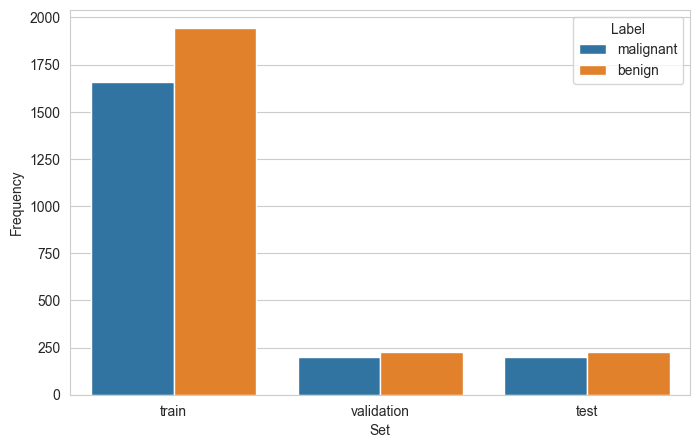

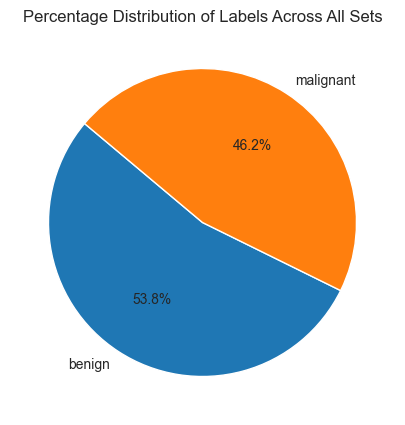

In [10]:
# Initialize an empty DataFrame to store label data
df_freq = pd.DataFrame(columns=['Set', 'Label', 'Frequency'])

for folder in ['train', 'validation', 'test']:
    for label in labels:
        label_data = pd.Series({
            'Set': folder,
            'Label': label,
            'Frequency': int(len(os.listdir(os.path.join(input_dir, folder, label))))
        })
        df_freq = df_freq.append(label_data, ignore_index=True)

        print(
            f'* {folder} - {label}: '
            f'{len(os.listdir(os.path.join(input_dir, folder, label)))}'
            f' images')

print("\n")


# Aggregating the frequencies of labels across all sets
total_label_distribution = df_freq.groupby('Label')['Frequency'].sum()


# Creating a report
report = "Total dataset balance report:\n"
for label, count in total_label_distribution.items():
    report += f"Label - {label}: {int(count)} images\n"

# Printing the report
print(report)
print("\n")

sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png',
            bbox_inches='tight', dpi=150)
plt.show()

# Create a pie chart
plt.figure(figsize=(8, 5))
total_label_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Labels Across All Sets')
plt.ylabel('')  # Hide the y-label

# Save the pie chart
plt.savefig(os.path.join(
    file_path,
    'label_distribution_across_all_sets.png'), bbox_inches='tight', dpi=150)
plt.show()

---

## Image data augmentation

---

### Import ImageDataGenerator

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

We will then setup the pipeline for the image data generator

In [12]:
from keras.preprocessing.image import ImageDataGenerator
augmentation_data = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.5, 1.5],
    shear_range=15,
    fill_mode='nearest',
    rescale=1.0/255.0,
)

### Augmentation of the training image dataset

In [13]:
batch_size = 20
train_set = augmentation_data.flow_from_directory(
    train_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
    )

train_set.class_indices

Found 3603 images belonging to 2 classes.


{'benign': 0, 'malignant': 1}

### Augmentation of the validation image dataset

In [14]:
validation_set = augmentation_data.flow_from_directory(
    validation_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
    )

validation_set.class_indices

Found 426 images belonging to 2 classes.


{'benign': 0, 'malignant': 1}

### Augmentation of the test image dataset

In [15]:
test_set = augmentation_data.flow_from_directory(
    test_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
    )

test_set.class_indices

Found 430 images belonging to 2 classes.


{'benign': 0, 'malignant': 1}